# Prosper Loan Dataset Exploration
## by Oreva Egwebe

## Introduction

> Prosper is the FIRST peer-to-peer personal loan lending platform in the US. This means that a personal loan through Prosper comes from traditional investors. Personal loans can be used for consolidating debt, renovating a home, wedding plans or vacation. A credit score of 600 or higher is required to qualify for a loan from Prosper. Other financial factors are evaluated such as employment status, and debt-to-income ratio to determine the terms of personal loan.

>This dataset from Prosper contains variables such as loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others which will be further investigated to find out which factors affect the outcome of a loan and interest rate. [More Information Here]('https://www.prosper.com/personal-loans-t1')


## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter('ignore')

In [2]:
#load the dataset into a dataframe and view a sample of the dataset
loan = pd.read_csv('prosperLoanData.csv')
loan.sample(10)

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
30591,BCF93533161178789B190B3,543169,14:56.4,NaN,36,Completed,11/15/2012 0:00,0.24983,0.2121,0.2021,...,-31.72,0.0,0.0,0.0,0.0,1.0,0,0,0.0,54
21728,5C8435420318356008F6F11,567230,54:37.4,NaN,36,Current,NaN,0.17359,0.1449,0.1349,...,-112.69,0.0,0.0,0.0,0.0,1.0,0,0,0.0,161
10395,93903600115287301EF648C,1129554,41:57.5,NaN,36,Current,NaN,0.26149,0.2235,0.2135,...,-15.23,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
66289,4.42E+23,1160291,26:55.7,NaN,36,Current,NaN,0.12081,0.0930,0.0830,...,-11.51,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
59925,0A6E35343816413360B3B7D,543998,22:53.1,NaN,36,Current,NaN,0.14358,0.1154,0.1054,...,-74.30,0.0,0.0,0.0,0.0,1.0,0,0,0.0,35
97260,C5D93602683509290690DC0,1145005,04:39.0,NaN,36,Current,NaN,0.12081,0.0930,0.0830,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
47280,337D3599108712921B8EB6C,1131819,15:51.9,NaN,60,Current,NaN,0.20808,0.1840,0.1740,...,-12.74,0.0,0.0,0.0,0.0,1.0,0,0,0.0,3
42911,4C7E3542153578681D9A1F8,572234,44:47.6,NaN,36,Current,NaN,0.24246,0.2049,0.1949,...,-93.36,0.0,0.0,0.0,0.0,1.0,0,0,0.0,21
97283,5329339045116665814F1FB,139931,40:06.5,E,36,Completed,6/22/2009 0:00,0.20471,0.1900,0.1800,...,-72.58,0.0,0.0,0.0,0.0,1.0,0,0,0.0,144
108257,E3B73548593235964DE7582,593470,46:33.2,NaN,36,Current,NaN,0.21372,0.1768,0.1668,...,-71.33,0.0,0.0,0.0,0.0,1.0,0,0,0.0,82


In [3]:
#view the total number of rows and columns of tha dataset
loan.shape

(113937, 81)

In [4]:
#view the entire list of columns in the dataset 
loan.columns

Index(['ListingKey', 'ListingNumber', 'ListingCreationDate', 'CreditGrade',
       'Term', 'LoanStatus', 'ClosedDate', 'BorrowerAPR', 'BorrowerRate',
       'LenderYield', 'EstimatedEffectiveYield', 'EstimatedLoss',
       'EstimatedReturn', 'ProsperRating (numeric)', 'ProsperRating (Alpha)',
       'ProsperScore', 'ListingCategory (numeric)', 'BorrowerState',
       'Occupation', 'EmploymentStatus', 'EmploymentStatusDuration',
       'IsBorrowerHomeowner', 'CurrentlyInGroup', 'GroupKey',
       'DateCreditPulled', 'CreditScoreRangeLower', 'CreditScoreRangeUpper',
       'FirstRecordedCreditLine', 'CurrentCreditLines', 'OpenCreditLines',
       'TotalCreditLinespast7years', 'OpenRevolvingAccounts',
       'OpenRevolvingMonthlyPayment', 'InquiriesLast6Months', 'TotalInquiries',
       'CurrentDelinquencies', 'AmountDelinquent', 'DelinquenciesLast7Years',
       'PublicRecordsLast10Years', 'PublicRecordsLast12Months',
       'RevolvingCreditBalance', 'BankcardUtilization',
       'Availa

In [4]:
#create a copy of the dataset
loan_clean = loan.copy()

In [5]:
#create a smaller dataframe with columns i'll be working with
loans = loan_clean[['BorrowerRate', 'Term', 'IncomeRange', 'ProsperRating (Alpha)', 'CreditGrade', 'BorrowerState',
                    'Occupation', 'EmploymentStatus', 'IsBorrowerHomeowner', 'IncomeVerifiable', 'CurrentCreditLines', 'CurrentDelinquencies', 'AvailableBankcardCredit', 'DebtToIncomeRatio', 'StatedMonthlyIncome',
                    'TotalProsperLoans', 'LoanOriginalAmount', 'LoanOriginationDate', 'ListingCategory (numeric)', 'ProsperScore']]

In [8]:
#view a sample of the new dataframe
loans.head()

,BorrowerRate,Term,IncomeRange,ProsperRating (Alpha),CreditGrade,BorrowerState,Occupation,EmploymentStatus,IsBorrowerHomeowner,IncomeVerifiable,CurrentCreditLines,CurrentDelinquencies,AvailableBankcardCredit,DebtToIncomeRatio,StatedMonthlyIncome,TotalProsperLoans,LoanOriginalAmount,LoanOriginationDate,ListingCategory (numeric),ProsperScore
0,0.1580,36,"$25,000-49,999",NaN,C,CO,Other,Self-employed,True,True,5.0,2.0,1500.0,0.17,3083.333333,NaN,9425,9/12/2007 0:00,0,NaN
1,0.0920,36,"$50,000-74,999",A,NaN,CO,Professional,Employed,False,True,14.0,0.0,10266.0,0.18,6125.000000,NaN,10000,3/3/2014 0:00,2,7.0
2,0.2750,36,Not displayed,NaN,HR,GA,Other,Not available,False,True,NaN,1.0,NaN,0.06,2083.333333,NaN,3001,1/17/2007 0:00,0,NaN
3,0.0974,36,"$25,000-49,999",A,NaN,GA,Skilled Labor,Employed,True,True,5.0,4.0,30754.0,0.15,2875.000000,NaN,10000,11/1/2012 0:00,16,9.0
4,0.2085,36,"$100,000+",D,NaN,MN,Executive,Employed,True,True,19.0,0.0,695.0,0.26,9583.333333,1.0,15000,9/20/2013 0:00,2,4.0


In [9]:
#view the datatypes of the dataset
loans.dtypes

BorrowerRate                 float64
Term                           int64
IncomeRange                   object
ProsperRating (Alpha)         object
CreditGrade                   object
BorrowerState                 object
Occupation                    object
EmploymentStatus              object
IsBorrowerHomeowner             bool
IncomeVerifiable                bool
CurrentCreditLines           float64
CurrentDelinquencies         float64
AvailableBankcardCredit      float64
DebtToIncomeRatio            float64
StatedMonthlyIncome          float64
TotalProsperLoans            float64
LoanOriginalAmount             int64
LoanOriginationDate           object
ListingCategory (numeric)      int64
ProsperScore                 float64
dtype: object

In [10]:
#view the count of occupation column
loans.Occupation.value_counts()

Other                          28617
Professional                   13628
Computer Programmer             4478
Executive                       4311
Teacher                         3759
                               ...  
Dentist                           68
Student - College Freshman        41
Student - Community College       28
Judge                             22
Student - Technical School        16
Name: Occupation, Length: 67, dtype: int64

In [11]:
#view the count of employment status column
loans.EmploymentStatus.value_counts()

Employed         67322
Full-time        26355
Self-employed     6134
Not available     5347
Other             3806
Part-time         1088
Not employed       835
Retired            795
Name: EmploymentStatus, dtype: int64

In [12]:
#view the count of IsborrowerHomeowner column
loans.IsBorrowerHomeowner.value_counts()

True     57478
False    56459
Name: IsBorrowerHomeowner, dtype: int64

In [13]:
#view the count of prosper score column
loans.ProsperScore.value_counts()

4.0     12595
6.0     12278
8.0     12053
7.0     10597
5.0      9813
3.0      7642
9.0      6911
2.0      5766
10.0     4750
11.0     1456
1.0       992
Name: ProsperScore, dtype: int64

In [14]:
#view the count of prosper rating(alpha) column
loans['ProsperRating (Alpha)'].value_counts()

C     18345
B     15581
A     14551
D     14274
E      9795
HR     6935
AA     5372
Name: ProsperRating (Alpha), dtype: int64

In [15]:
#view the count of credit grade column
loans.CreditGrade.value_counts()

C     5649
D     5153
B     4389
AA    3509
HR    3508
A     3315
E     3289
NC     141
Name: CreditGrade, dtype: int64

In [18]:
#view the count for income range column
loans.IncomeRange.value_counts()

$25,000-49,999    32192
$50,000-74,999    31050
$100,000+         17337
$75,000-99,999    16916
Not displayed      7741
$1-24,999          7274
Not employed        806
$0                  621
Name: IncomeRange, dtype: int64

In [19]:
#view the count of IncomeVerifiable column
loans.IncomeVerifiable.value_counts()

True     105268
False      8669
Name: IncomeVerifiable, dtype: int64

In [20]:
#view the count of listingCategory column
loans['ListingCategory (numeric)'].value_counts()

1     58308
0     16965
7     10494
2      7433
3      7189
6      2572
4      2395
13     1996
15     1522
18      885
14      876
20      771
19      768
5       756
16      304
11      217
8       199
10       91
9        85
12       59
17       52
Name: ListingCategory (numeric), dtype: int64

In [23]:
#view the count, mean, std, min and max for the numeric columns
loans[['BorrowerRate', 'StatedMonthlyIncome', 'LoanOriginalAmount']].describe()

,BorrowerRate,StatedMonthlyIncome,LoanOriginalAmount
count,113937.000000,1.139370e+05,113937.00000
mean,0.192764,5.608026e+03,8337.01385
std,0.074818,7.478497e+03,6245.80058
min,0.000000,0.000000e+00,1000.00000
25%,0.134000,3.200333e+03,4000.00000
50%,0.184000,4.666667e+03,6500.00000
75%,0.250000,6.825000e+03,12000.00000
max,0.497500,1.750003e+06,35000.00000


### What is the structure of your dataset?

> The Prosper Loan dataset has a total of 81 columns and 113,937 observations from 2005 to 2014. The dataset contains numeric and categorical variables. ProsperScore, CreditGrade and ProsperRating are ordinal data types. ProsperScore ranges from 1-10, with 10 being the best, or lowest risk score. CreditGrade and ProsperRating are rated ranging from AA, A, B, C, D, E, HR with AA being the best rating.

### What is/are the main feature(s) of interest in your dataset?

> I'm mostly focused on the variables that affect the loan amount and interest rate.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> I expect that the variables: BorrowerRate, CreditGrade, ProsperScore, IsBorrowerHomeowner, EmploymentStatus and IncomeVerifiable will have an effect in determining the loan interest rate.

### Description of some Terms
1. CreditGrade: The Credit rating that was assigned at the time the listing went live. Applicable for listings pre-2009 period and will only be populated for those listings.
2. Term: The length of the loan expressed in months.
3. IncomeVerifiable: The borrower indicated they have the required documentation to support their income
4. BorrowerRate: The Borrower's interest rate for this loan.
5. ProsperRating (Alpha) The Prosper Rating assigned at the time the listing was created between AA - HR. Applicable for loans originated after July 2009.
6. ProsperScore: A custom risk score built using historical Prosper data. The score ranges from 1-10, with 10 being the best, or lowest risk score. Applicable for loans originated after July 2009.
7. ListingCategory: The category of the listing that the borrower selected when posting their listing: 0 - Not Available, 1 - Debt Consolidation, 2 - Home Improvement, 3 - Business, 4 - Personal Loan, 5 - Student Use, 6 - Auto, 7- Other, 8 - Baby&Adoption, 9 - Boat, 10 - Cosmetic Procedure, 11 - Engagement Ring, 12 - Green Loans, 13 - Household Expenses, 14 - Large Purchases, 15 - Medical/Dental, 16 - Motorcycle, 17 - RV, 18 - Taxes, 19 - Vacation, 20 - Wedding Loans
8. BorrowerState: The two letter abbreviation of the state of the address of the borrower at the time the Listing was created.
9. Occupation: The Occupation selected by the Borrower at the time they created the listing.
10. EmploymentStatus: The employment status of the borrower at the time they posted the listing.
11. IsBorrowerHomeowner: A Borrower will be classified as a homowner if they have a mortgage on their credit profile or provide documentation confirming they are a homeowner.
12. AvailableBankcardCredit: The total available credit via bank card at the time the credit profile was pulled.
13. DebtToIncomeRatio: The debt to income ratio of the borrower at the time the credit profile was pulled. This value is Null if the debt to income ratio is not available. This value is capped at 10.01 (any debt to income ratio larger than 1000% will be returned as 1001%).
14. IncomeRange: The income range of the borrower at the time the listing was created.
15. LoanOriginalAmount: The origination amount of the loan.
16. LoanOriginationDate: The date the loan was originated.
17. CurrentCreditLines: Number of current credit lines at the time the credit profile was pulled.
18. CurrentDelinquencies: Number of accounts delinquent at the time the credit profile was pulled.
19. StatedMonthlyIncome: The monthly income the borrower stated at the time the listing was created.
20. TotalProsperLoans: Number of Prosper loans the borrower at the time they created this listing. This value will be null if the borrower had no prior loans.

## Univariate Exploration

> I'll start by exploring the distribution of the main variables of interest- Loan Original Amount and Borrower rate

**Loan Original Amount**

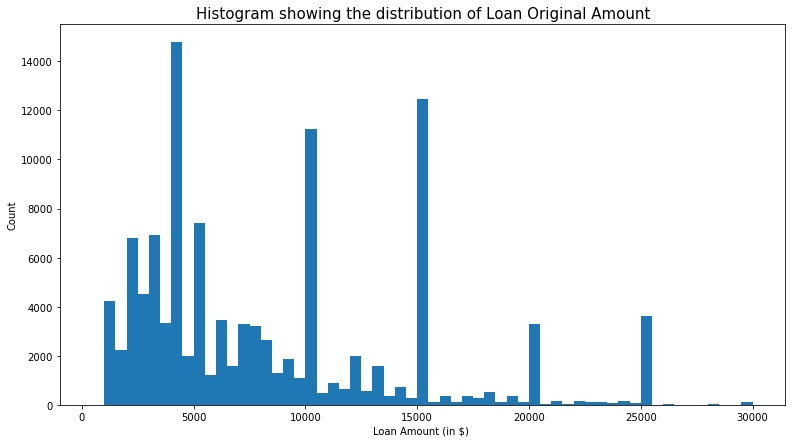

In [8]:
#plot the histogram for loan original amount
plt.figure(figsize = [13,7])
base_color = sb.color_palette()[0]
bin_edges= np.arange(500, 30000+500, 500);
plt.hist(data=loans, x='LoanOriginalAmount', bins=bin_edges);
plt.ylabel('Count')
plt.xlabel('Loan Amount (in $) ')
plt.title('Histogram showing the distribution of Loan Original Amount', fontsize=15);

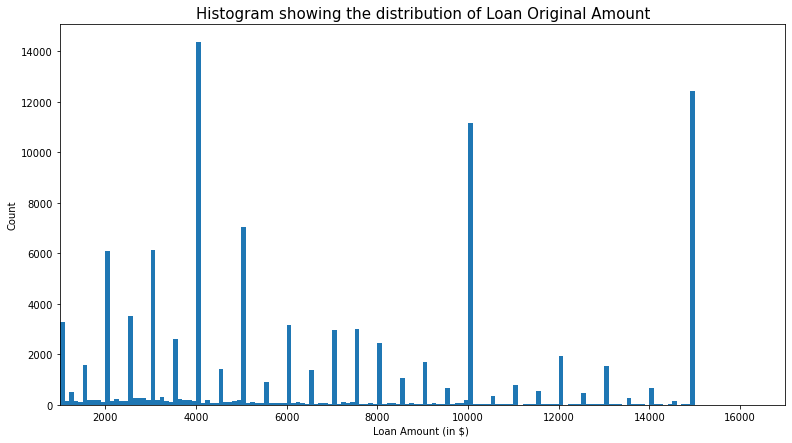

In [35]:
# i want to look at a smaller bin size
plt.figure(figsize = [13,7])
bin_edges= np.arange(0, 15000+100, 100);
plt.hist(data=loans, x='LoanOriginalAmount', bins=bin_edges);
plt.ylabel('Count')
plt.xlabel('Loan Amount (in $) ')
plt.xlim(1000, 17000)
plt.title('Histogram showing the distribution of Loan Original Amount', fontsize=15);

>The distribution shows a right-tailed distribution with very large spikes in frequency at the bars with amount of 4000, 10000 and 15,000. These probably represent the polpular amounts of loan taken for borrowers.

I'll move on to Borrower rate next.

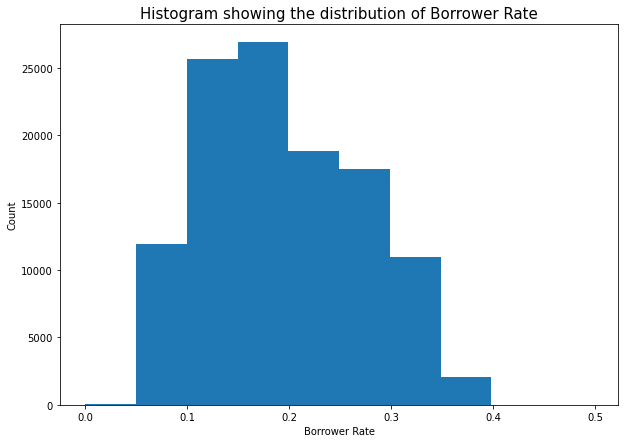

In [38]:
#plot the histogram for borrower rate
plt.figure(figsize = [10,7])
plt.hist(data=loans, x='BorrowerRate');
plt.ylabel('Count')
plt.xlabel('Borrower Rate')
plt.title('Histogram showing the distribution of Borrower Rate', fontsize=15);

>This shows a right-skewed distribution with the highest frequency between the values between 0.1 to 0.2 rate.

**Is Borrower home owner**

I want a see a count of the borrowers that are home owners and those that are not.

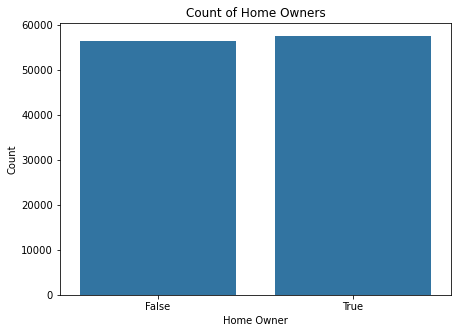

In [41]:
#plot a bar chart for IsBorrowerHomeowner 
plt.figure(figsize= [7, 5])
base_color = sb.color_palette()[0]
sb.countplot(data=loans, x='IsBorrowerHomeowner', color=base_color);
plt.xlabel('Home Owner')
plt.ylabel('Count')
plt.title('Count of Home Owners');

>There is no much difference between the borrowers that are home owners and those that are not. This will investigated further to see if it affects interest rate.

**Credit Grade, Prosper Rating**

Credit Grade was used by Prosper before 2009, Prosper Rating was used after 2009. I want to see if there are any similarities between the counts of the two variables. First I have order the categories into ordinal categorical variables from best grade to worst.

In [6]:
#convert CreditGrade and ProsperRating to ordinal categorical variables
order_credit = ['AA', 'A', 'B', 'C', 'D', 'E', 'HR']
ordered_var = pd.api.types.CategoricalDtype(ordered=True, categories=order_credit)
loans['CreditGrade'] = loans['CreditGrade'].astype(ordered_var)

order_prosper = ['AA', 'A', 'B', 'C', 'D', 'E', 'HR']
ordered_var = pd.api.types.CategoricalDtype(ordered=True, categories=order_prosper)
loans['ProsperRating (Alpha)'] = loans['ProsperRating (Alpha)'].astype(ordered_var)

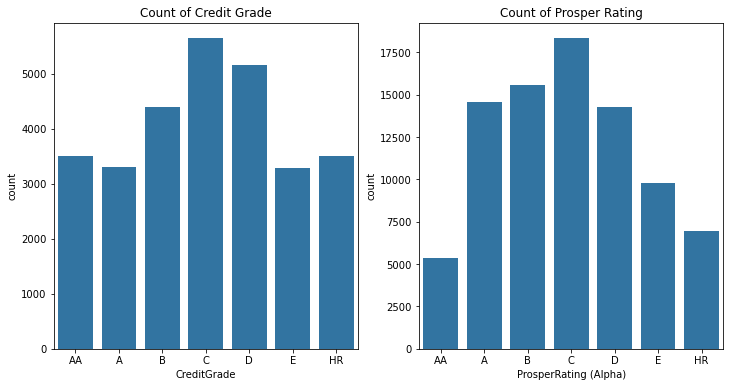

In [9]:
#plot a barchart of CreditGrade on the first axis
plt.figure(figsize= [12, 6])
plt.subplot(1,2,1)
sb.countplot(data=loans, x='CreditGrade', color=base_color);
plt.title('Count of Credit Grade')

#plot a barchart of ProsperRating on the second axis
plt.subplot(1,2,2)
sb.countplot(data=loans, x='ProsperRating (Alpha)', color=base_color);
plt.title('Count of Prosper Rating');

>The charts shows that before and after 2009, **C** is the rating with the highest count. This will be further investigated to find out if these variables affect loan amount or interest rate.

**Prosper Score**

This value is calculated from historical Prosper data. I want to a see a count of the score in the dataset

In [5]:
#replace 11 with null because prosperScore ranges from 1-10
loans['ProsperScore'].replace([11], np.nan, inplace=True)

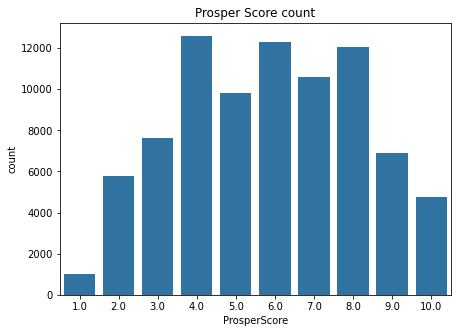

In [100]:
#plot a count of Prosper Score
plt.figure(figsize= [7, 5])
base_color = sb.color_palette()[0]
sb.countplot(data=loans, x='ProsperScore', color=base_color);
plt.title('Prosper Score count');

>This shows that most the borrowers Prosper Score falls between 4-8. 10 is said to be the best score, followed by 9 in that order. This will be further investigated to see how it affects interest rate. 

**Income Range**

I also want to see a count of the different Income ranges in the dataset.

In [6]:
#replace not displayed and $0 with null to get an accurate distribution
loans['IncomeRange'].replace(['Not displayed', '$0'], np.nan, inplace=True)

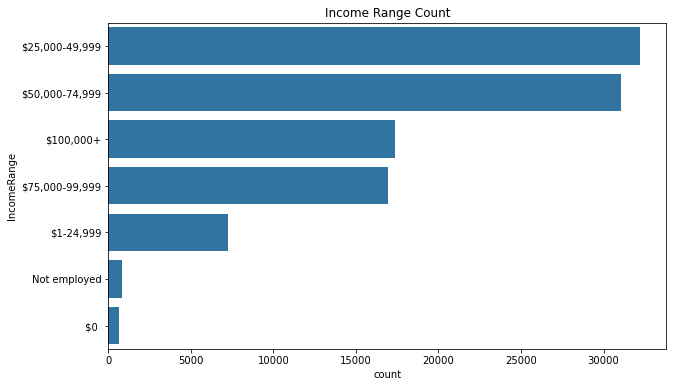

In [59]:
#plot a bar chart showing the Income range count
plt.figure(figsize= [10, 6])
base_color = sb.color_palette()[0]
sb.countplot(data=loans, y='IncomeRange', color=base_color);
plt.title('Income Range Count');

>This shows that most borrowers fall between the income range of $25,000 - 75,000. This will be further investigated to see if it affects interest rate and loan amount.

**Employment Status**

I want to see a count of the column Employment status

In [7]:
 #replace other, not available with null to view an accurate count
loans['EmploymentStatus'].replace(['Other', 'Not available'], np.nan, inplace=True)

In [63]:
#order the categories in a descending order
status_order = loans.EmploymentStatus.value_counts().index

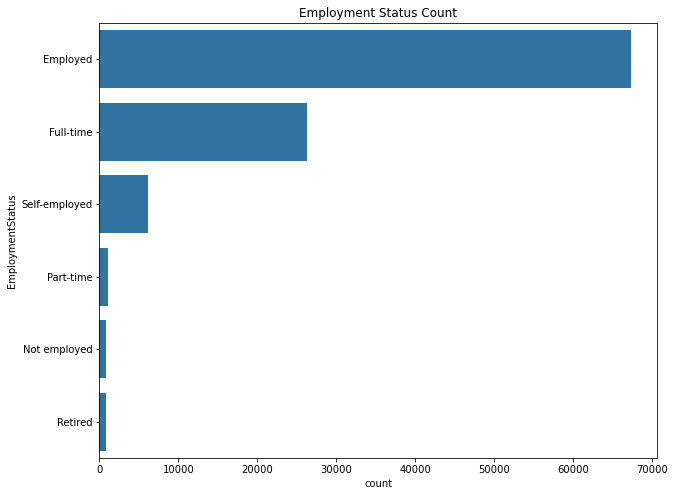

In [64]:
#plot a bar chart showing the employment status count
plt.figure(figsize= [10, 8])
base_color = sb.color_palette()[0]
sb.countplot(data=loans, y='EmploymentStatus', order=status_order, color=base_color);
plt.title('Employment Status Count');

>The chart shows a large difference between Employed and other categories. This might mean that employment status is an important factor in giving loans and the interest rate.

**Listing Category**

I want to see a categories count of what the loan is collected for.

In [8]:
#create a dict. for listing category by assigning a description to the numbers
new_listing = {0 : 'Not Available', 1 : 'Debt Consolidation', 2 : 'Home Improvement', 3:'Business', 4 : 'Personal Loan', 
               5 : 'Student Use', 6 : 'Auto', 7: 'Other', 8 : 'Baby&Adoption', 9 : 'Boat', 10 : 'Cosmetic Procedure',
               11 : 'Engagement Ring', 12 : 'Green Loans', 13 : 'Household Expenses', 14 : 'Large Purchases', 
               15 : 'Medical/Dental', 16 : 'Motorcycle', 17 : 'RV', 18 : 'Taxes', 19 : 'Vacation', 20 : 'Wedding Loans'}

In [9]:
#map the new list
loans['ListingCategory'] = loans['ListingCategory (numeric)'].map(new_listing)

In [10]:
#replace other, not available to get an accurate count
loans['ListingCategory'].replace(['Not Available', 'Other'], np.nan, inplace=True)

In [68]:
#get the top 10 listings
listing_order = loans.ListingCategory.value_counts().sort_values(ascending=False).head(10)
listing_order

Debt Consolidation    58308
Home Improvement       7433
Business               7189
Auto                   2572
Personal Loan          2395
Household Expenses     1996
Medical/Dental         1522
Taxes                   885
Large Purchases         876
Wedding Loans           771
Name: ListingCategory, dtype: int64

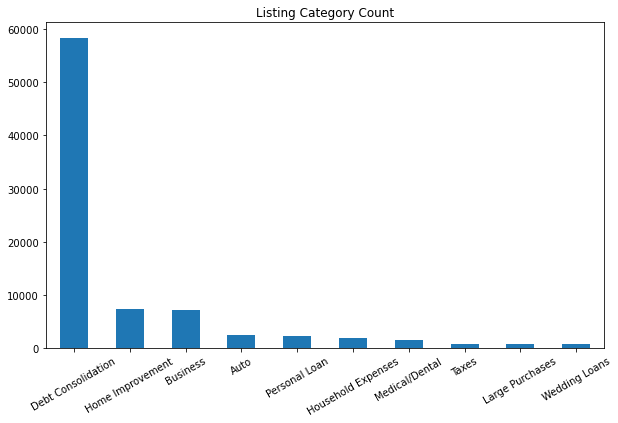

In [71]:
#plot a bar chart showing top 10 listing category count
plt.figure(figsize= [10, 6])
base_color = sb.color_palette()[0]
listing_order.plot(kind='bar', color=base_color);
plt.title('Listing Category Count')
plt.xticks(rotation=30);

>This chart shows that most people borrow money because of debt consolidation. This will be further addressed to know if there are other variables that might affect this outcome.

**Income Verifiable**

I want to see the count of income verified status in the dataset.

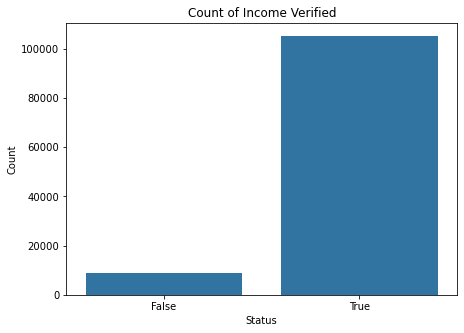

In [74]:
#plot a bar chart for IsBorrowerHomeowner 
plt.figure(figsize= [7, 5])
base_color = sb.color_palette()[0]
sb.countplot(data=loans, x='IncomeVerifiable', color=base_color);
plt.ylabel('Count')
plt.xlabel('Status')
plt.title('Count of Income Verified');

>This chart shows a large difference between borrowers whose income have been verified and those who have not been verified. This implies that this a major factor in determining a loan outcome. This will be further investigated with other variables.

**Stated Monthly Income**

I want to see a distribution of monthly income stated by the borrowers.

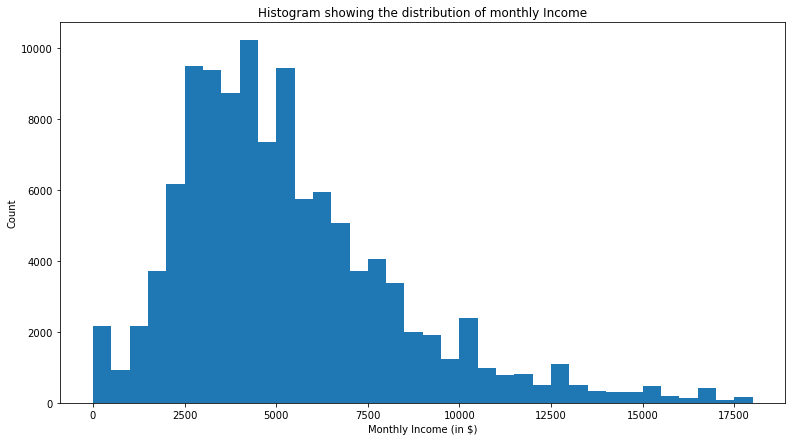

In [79]:
#plot a histogram showing the distribution of StatedMonthlyIncome
plt.figure(figsize = [13,7])
bin_edges= np.arange(0, 18000+500, 500);
plt.hist(data=loans, x='StatedMonthlyIncome', bins=bin_edges);
plt.ylabel('Count')
plt.xlabel('Monthly Income (in $)')
plt.title('Histogram showing the distribution of monthly Income');

>This distribution is right-tailed and most incomes fall between $2500 and 5000 monthly.

In [11]:
#change the datatype of LoanOriginationDate to datetime and create a new column, year
loans['LoanOriginationDate'] = pd.to_datetime(loans['LoanOriginationDate'])
loans['year'] = loans['LoanOriginationDate'].dt.year

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> Loan original amount has a large range of values, so I plotted a smaller range of values from $1000 - 17000.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

>Credit Grade and Prosper Rating categorical variables were not ordered. I changed the datatype to ordinal datatype so as to easiliy distinguish between the best and worst grades.  
Prosper Score had some values recorded as 11, this is out of place because the values ranges from 1-10. This could be as a result of data entry error. The values were replaced with null. 
For Income range, count of '$0' and 'not displayed' were set to null to better see the count of other categorical variables. 'Other' and 'Not available' were also set to null also for Listing Category and Employment status columns.

## Bivariate Exploration

### Income Range vs Borrower Rate

I want to see the relationship between borrower rate(numeric variable) and income range(categorical) variable using violinplot.

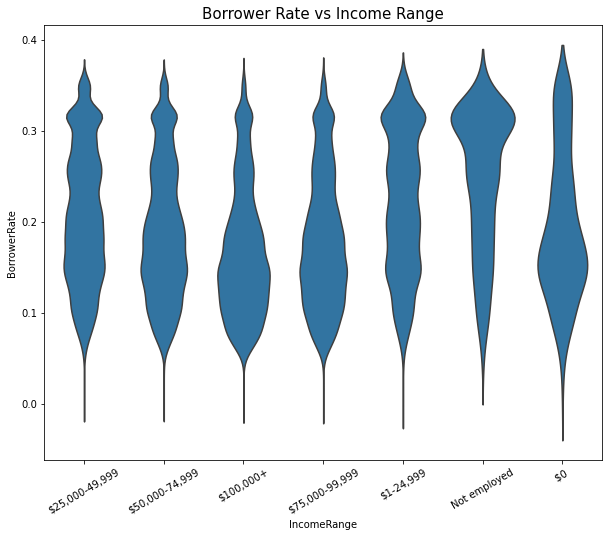

In [91]:
#plot a violin chart between borrowerRate and IncomeRange
plt.figure(figsize = [10, 8]) 
sb.violinplot(data=loans, x='IncomeRange', y='BorrowerRate', color=base_color, inner=None);
plt.title('Borrower Rate vs Income Range', fontsize=15)
plt.xticks(rotation=30);

>The chart shows that income range above $25,000 have a low interest rate compared to borrowers that are not employed.

### Emloyment Status vs Loan Original Amount

I want to see the relationship between loan original amount(numeric variable) and employment status(categorical) variable using violinplot.

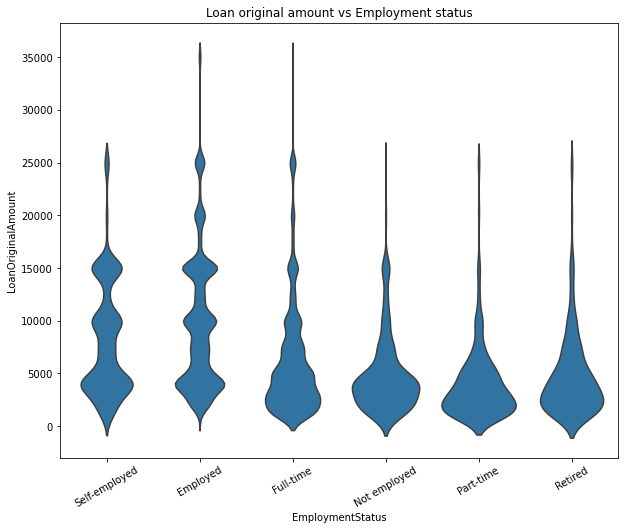

In [101]:
plt.figure(figsize = [10, 8]) 
sb.violinplot(data=loans, x='EmploymentStatus', y='LoanOriginalAmount', color=base_color, inner=None);
plt.title('Loan original amount vs Employment status')
plt.xticks(rotation=30);

>The chart shows $4000 as a popular loan amount across the different employment categories. This corresponds with the previous histogram of loan original amount plotted.

**Borrower Rate vs Credit Grade**

I want to see the relationship between borrower rate(numeric variable) and credit grade(categorical variable) using boxplot.

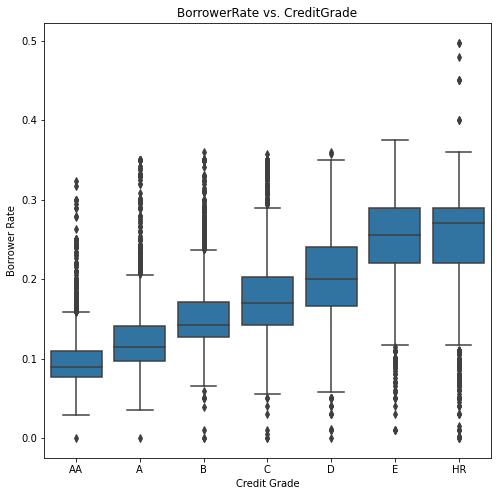

In [17]:
#plot a boxplot of borrowerRate vs CreditGrade
base_color=sb.color_palette()[0]
plt.figure(figsize = [8, 8])
sb.boxplot(data = loans, x= 'CreditGrade', y='BorrowerRate', color=base_color);
plt.title('BorrowerRate vs. CreditGrade')
plt.xlabel('Credit Grade')
plt.ylabel('Borrower Rate');

>From the boxplot we are able to see how credit grade was used by Prosper before 2009. The best grade 'AA' receives the lowest interest rate and the interest rates increases as grades reduces. There are outliers in this plot which may as a result of another variable influencing the outcome which will be investigated.

**Borrower Rate vs Prosper Rating(Alpha)**

I want to see the relationship between borrower rate(numeric variable) and prosper score(categorical) variable using boxplot.

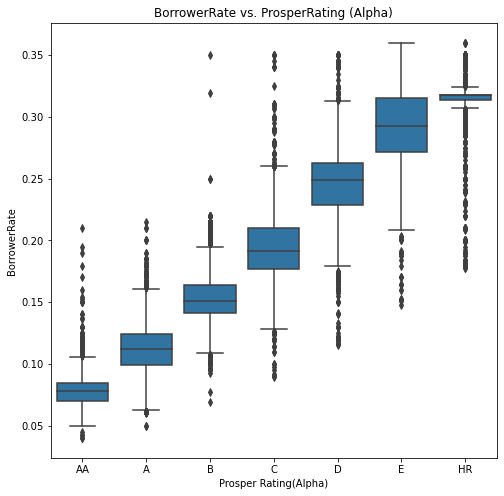

In [18]:
#plot a boxplot to see the relationship between borrowerRate and ProsperRating
plt.figure(figsize = [8, 8])
sb.boxplot(data =loans, x = 'ProsperRating (Alpha)', y = 'BorrowerRate', color=base_color)
plt.title('BorrowerRate vs. ProsperRating (Alpha)')
plt.xlabel('Prosper Rating(Alpha)')
plt.ylabel('BorrowerRate');

>From the boxplot we are able to see how Prosper Rating is used by Prosper after 2009. The best grade 'AA' receives the lowest interest rate, HR(High Risk) receives the highest interest rate which is simialr to how credit grade was used before 2009. There are outliers in this plot which may as a result of another variable influencing the outcome which will be investigated.

<Figure size 720x720 with 0 Axes>

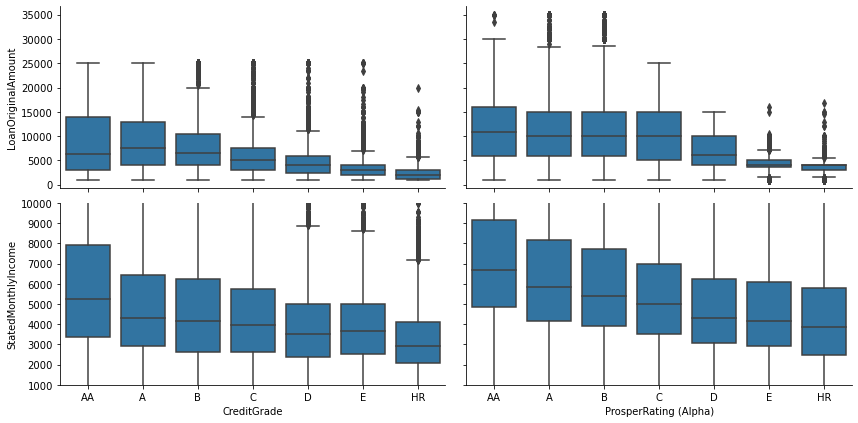

In [16]:
#use a boxplot function to see the relationship with loan amount
def boxgrid(x, y, **kwargs):
    """ Quick hack for creating box plots with seaborn's PairGrid. """
    default_color = sb.color_palette()[0]
    sb.boxplot(x=x, y=y, color=default_color)

plt.figure(figsize = [10, 10])
g = sb.PairGrid(data = loans, y_vars = ['LoanOriginalAmount', 'StatedMonthlyIncome'], x_vars = ['CreditGrade', 'ProsperRating (Alpha)'],
                size = 3, aspect = 2)
plt.ylim(1000, 10000)
g.map(boxgrid);
plt.show();

>We can see from the boxplot that for credit grade(before 2009), the median monthly income is almost the same for the different grades except for grade 'AA'. For prosper rating(after 2009), the median monthly income can be seen decreasing across the ratings. We can therefore say that after 2009, monthly income is an important factor to consider for Prosper rating.
For credit grade(before 2009), 'A' has the highest median for loan amount before 'AA' which is not meant to be since 'AA' is the best grade. For prosper rating(after 2009), there is shown to be consistent median for loan amount across ratings; 'AA', 'A', 'B' and 'C'. 

**Borrower Rate vs Prosper Score**

I want to see the relationship between borrower rate(numeric variable) and prosper score(categorical) variable using boxplot.

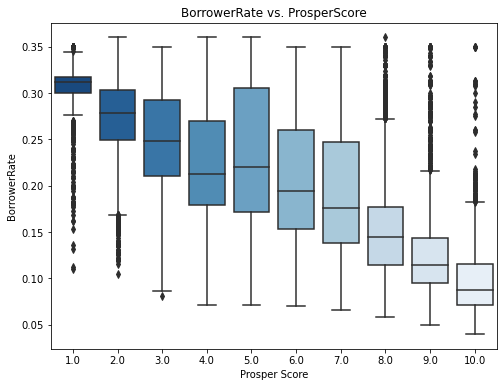

In [111]:
#plot a boxplot for borrower rate and prosper score
plt.figure(figsize = [8, 6])
sb.boxplot(data =loans, x = 'ProsperScore', y = 'BorrowerRate', palette='Blues_r')
plt.title('BorrowerRate vs. ProsperScore')
plt.xlabel('Prosper Score')
plt.ylabel('BorrowerRate');

>This boxplot chart shows that the best prosper score 10 has a lower interest rate and that the interest rate increases as the prosper score decreases.

**Loan Original amount vs Stated Monthly income**

I want to see the relationship between loan original amount(numeric variable) and stated monthly income(numeric variable) using scatterplot.

In [113]:
#use a random sample from the dataset
sample= np.random.choice(loans.shape[0], 1000, replace=False)
loans_subset = loans.loc[sample]

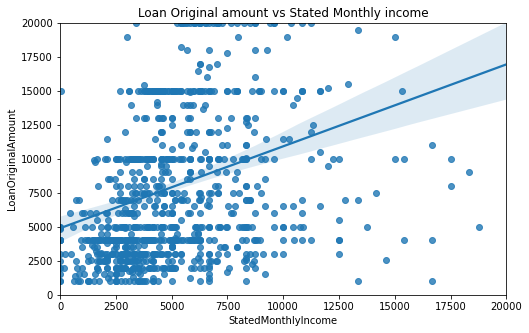

In [115]:
#plot a scatterplot to show the relationship between the numeric variables with xlim and ylim set to 20000
plt.figure(figsize = [8,5]) 
sb.regplot(data =loans_subset, x = 'StatedMonthlyIncome', y = 'LoanOriginalAmount',color=base_color);
plt.title('Loan Original amount vs Stated Monthly income')
plt.xlim(0, 20000)
plt.ylim(0, 20000);

>The scatterplot shows a positive linear relationship between loan original amount and stated monthly income. This shows that the monthly income of a borrower affect the loan amount given to him.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Prosper score, credit grade, prosper rating are highly correlated with borrower rate as expected. Some outliers were observed which will be observed with other variables to see the outcome. This outliers might be as a result of other variables such as: Income verifiable, home owners, or employment staus. This will be worth further exploration. The violin plot of loan original amount vs employment status also showed $4000 as the popular amount of loan collected which corresponds with the previous histogram of loan original amount plotted. A scatterplot between loan original amount and stated monthly income showed a positive linear relationship. Income range did not show a strong relationship with borrower rate. No further analysis will be performed on this.


## Multivariate Exploration

### What is the relationship between the numeric variables- Borrower rate, Loan Original amount and Stated Monthly income?

I want to find the correlation and relationship between the variables: Borrower rate, Loan Original amount and Stated Monthly income using a Heatmap and PairGrid chart.

In [23]:
#select the variables to a dataframe
var = loans[['BorrowerRate', 'LoanOriginalAmount', 'StatedMonthlyIncome']]

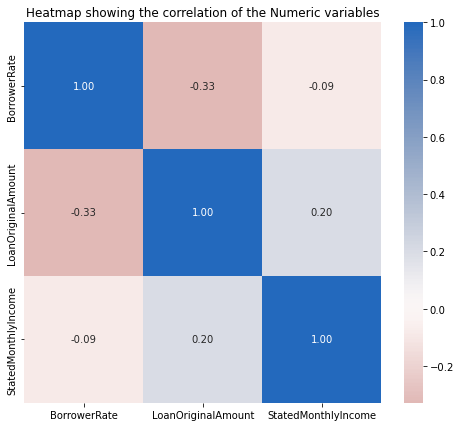

In [24]:
#plot the heatmap showing the relationship between the numeric variables
plt.figure(figsize= [8, 7])
sb.heatmap(var.corr(), annot=True, fmt='.2f', cmap='vlag_r', center=0);
plt.title('Heatmap showing the correlation of the Numeric variables', fontsize=12);

>The correlation coefficient of borrower rate and loan original amount is -0.33 and shows a negative moderate correlation between loan original amount and borrower rate which means that borrower rate does not increase as loan original amount increases. There is a weak correlation between stated monthly income and borrower rate, also with loan original amount.

In [25]:
#use a random sample from the dataset
sample= np.random.choice(loans.shape[0], 1000, replace=False)
loans_subset = loans.loc[sample]

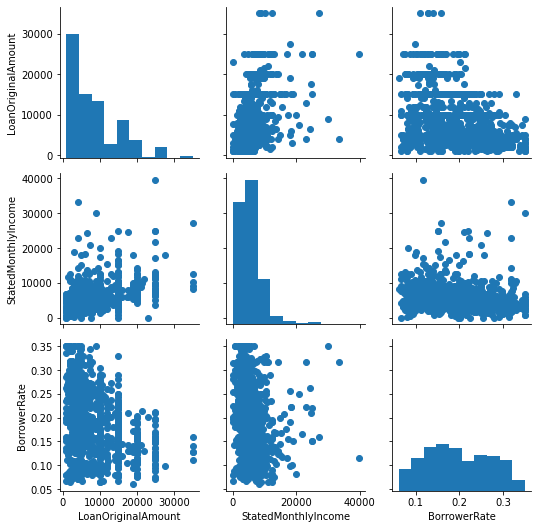

In [26]:
#plot a pairgrid of a histogram and scatterplot of the numeric variables
g= sb.PairGrid(data=loans_subset, vars=['LoanOriginalAmount', 'StatedMonthlyIncome', 'BorrowerRate']);
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter);

>This shows a positive relationship between stated monthly income and loan original amount. There is a negative relationship between borrower rate and loan original amount, and also showed no relationship between stated monthly income and borrower rate just as stated above.

### How does monthly income and being a home owner affect loan original amount?

In [18]:
#use a random sample from the dataset
sample= np.random.choice(loans.shape[0], 1000, replace=False)
loans_subset = loans.loc[sample]

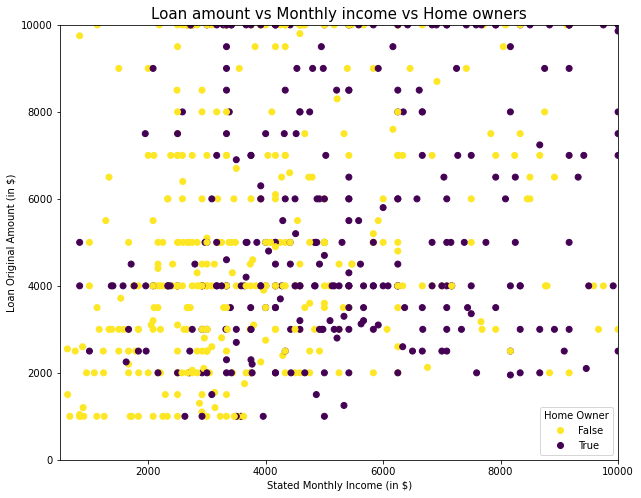

In [19]:
#plot a scatterplot with IsBorrowerHomeowner as the third variable
plt.figure(figsize = [10, 8]) 
scatter = plt.scatter(data =loans_subset, y = 'LoanOriginalAmount', x= 'StatedMonthlyIncome', c='IsBorrowerHomeowner', cmap='viridis_r');
plt.ylim(0, 10000)
plt.xlim(500, 10000)
classes= ['False', 'True']
plt.legend(handles=scatter.legend_elements()[0], labels=classes, title='Home Owner')
plt.title('Loan amount vs Monthly income vs Home owners', fontsize=15)
plt.xlabel('Stated Monthly Income (in $)')
plt.ylabel('Loan Original Amount (in $)');

>There are a lot of overlapping points in this plot. It doesn't show clearly how monthly income and being a home owner affects loan original amount.

### What is the relationship with borrower rate and being a home owner across the years?

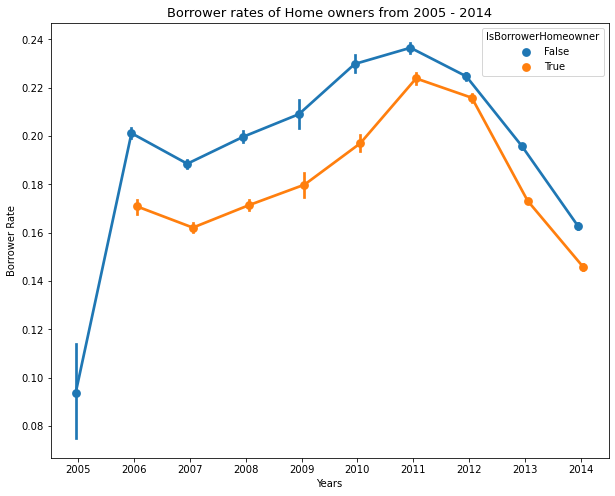

In [32]:
#plot a pointplot to view th borrower rates across the years for home owners
plt.figure(figsize=[10,8])
ax = sb.pointplot(data=loans, x='year', y='BorrowerRate', hue='IsBorrowerHomeowner', dodge=0.1, linestyles="-");
plt.title('Borrower rates of Home owners from 2005 - 2014', fontsize=13);
plt.xlabel('Years')
plt.ylabel('Borrower Rates');

>We can see the trend of home owners and their borrower rates across the years which shows borrowers that are not home owners tend to have a higher interest rate compared to home owners.

### What is the loan amount for home owners in the listing categories?

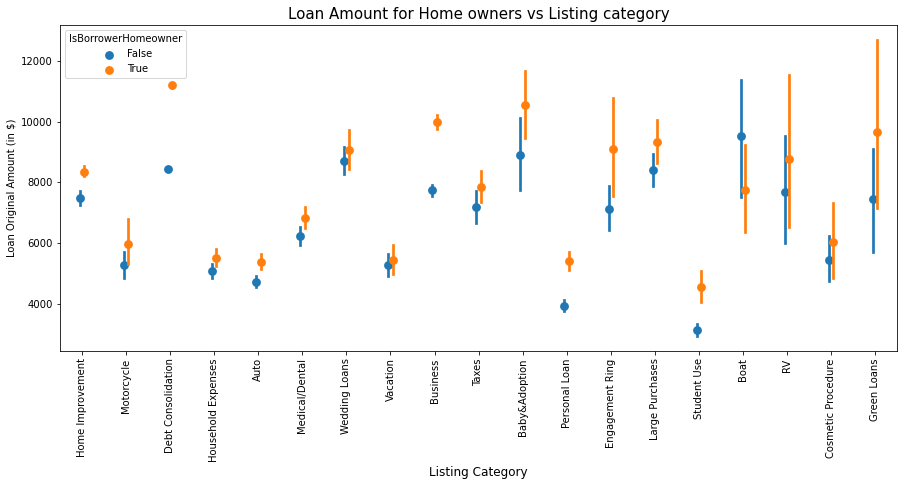

In [33]:
#plot a pointplot showing the loan amount vs listing category for home owners
plt.figure(figsize=[15,6])
ax = sb.pointplot(data=loans, x='ListingCategory', y='LoanOriginalAmount', hue='IsBorrowerHomeowner', dodge=0.1, linestyles="");
plt.title('Loan Amount for Home owners vs Listing category', fontsize=15);
plt.xlabel('Listing Category', fontsize=12)
plt.ylabel('Loan Original Amount (in $)', fontsize=10);
plt.xticks(rotation=90);

> We can see from the chart that home owners tend to take a higher loan amount for every listing category except to buy a boat.

### Does being a home owner and employed affect loan amount or borrower rate?

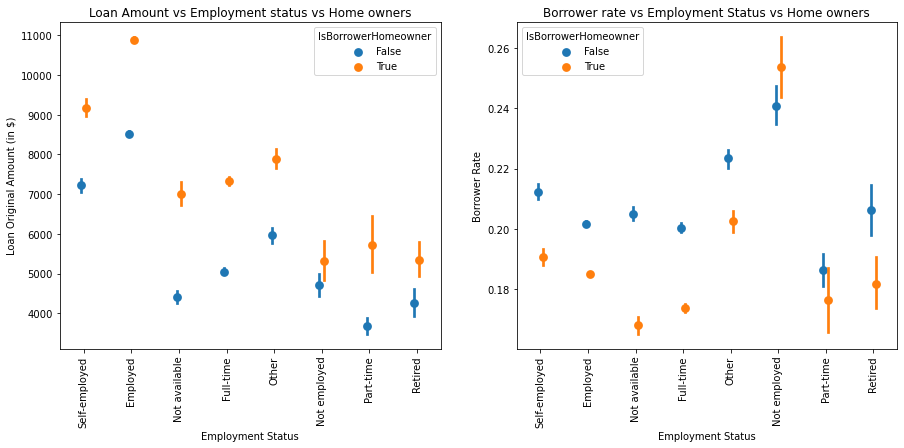

In [17]:
#plot subplots to easily compare the differences
plt.figure(figsize=[15,6])
plt.subplot(1,2,1)
ax = sb.pointplot(data=loans, x='EmploymentStatus', y='LoanOriginalAmount', hue='IsBorrowerHomeowner', dodge=0.1, linestyles="");
plt.title('Loan Amount vs Employment status vs Home owners')
plt.xlabel('Employment Status')
plt.ylabel('Loan Original Amount (in $)');
plt.xticks(rotation=90);

plt.subplot(1,2,2)
ax = sb.pointplot(data=loans, x='EmploymentStatus', y='BorrowerRate', hue='IsBorrowerHomeowner', dodge=0.1, linestyles="");
plt.title('Borrower rate vs Employment Status vs Home owners')
plt.xlabel('Employment Status')
plt.ylabel('Borrower Rate');
plt.xticks(rotation=90);

>We can see clearly from the point plot charts that being a home owner helps you access a higher loan amount for all employment status categories. Borrowers not employed have a higher interest rate despite the fact if they are home owners or not.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> I extended my investigation in this section to know the variables that highly impact loan amount and interest rates. The multivariate exploration indeed showed that employment status and being a home owner are major factors that affect loan outcome and interest rates. A borrower who is a home owner and employed will likely have a higher loan amount and lower interest rate compared to a borrower who is unemployed.

### Were there any interesting or surprising interactions between features?

> There is no correlation between monthly income and borrower was a surprising feature in the dataset. Also, that there is a negative relationship and correlation between loan original amount and borrower rate is interesting. 

## Conclusions
> Home owners are more likely to take a loan for debt consolidation before another listing category. Loan amount and monthly income have a positive linear relationship, which means that the higher your monthly income is, the higher loan amount you can access. Borrower rates plotted by year showed a consistent rise in interest rates from 2005-2011 then started to decline. There is a weak correlation between monthly income and borrower rates which means that it is not a deciding factor of interest rates.
Prosper score, credit grade/prosper rating have a huge effect on borrowers rates even though there were some outliers.
Employment status and being a home owner have proven to be major factors that affect loan outcome and interest rates. After 2009, monthly income is an important factor to consider for Prosper rating, before 2009 monthly income did not seem to affect credit grade. Prosper rating did not seem to have that much effect on loan amount after 2009 but was inconsistent before 2009 loans.

In [42]:
#save the updated dataset to a csv file
loans.to_csv('loans.csv', index=False)